# 📊 Crypto Price Analysis using Python & Dash

This project demonstrates **financial data analysis** on cryptocurrency markets using the **CoinGecko API**.  
We analyze **price trends, moving averages, and volatility**, and visualize them with interactive charts.  

👉 Later, this analysis is deployed into an **interactive dashboard** using **Plotly Dash**.  

---

In [1]:
# 🔹 Step 1: Import Libraries
import requests
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

## 🔹 Step 2: Fetch Crypto Data from CoinGecko API

We use the **CoinGecko free API** to fetch price data.  
The API provides prices at different intervals (1m, 1h, 1d).  

Function: `get_crypto_data()`
- Inputs: coin (e.g., "bitcoin"), currency (e.g., "usd"), days (e.g., 30)  
- Output: Pandas DataFrame with timestamps and prices


In [2]:
def get_crypto_data(coin="bitcoin", currency="usd", days=30):
    url = f"https://api.coingecko.com/api/v3/coins/{coin}/market_chart"
    params = {"vs_currency": currency, "days": days}
    resp = requests.get(url, params=params).json()
    df = pd.DataFrame(resp["prices"], columns=["timestamp", "price"])
    df["timestamp"] = pd.to_datetime(df["timestamp"], unit="ms")
    return df

# Example: Bitcoin last 60 days
df = get_crypto_data("bitcoin", "usd", 60)
df.head()

,timestamp,price
0,2025-06-26 16:03:15.562,107247.037382
1,2025-06-26 17:04:10.788,107192.580462
2,2025-06-26 18:03:05.492,107269.669227
3,2025-06-26 19:03:39.632,107400.960104
4,2025-06-26 20:03:48.321,107572.246205


## 🔹 Step 3: Financial Analysis (Moving Averages + Volatility)

We use **pandas_ta** to calculate indicators:
- **SMA 10**: Short-term Simple Moving Average  
- **SMA 30**: Long-term Simple Moving Average  
- **Volatility**: Rolling Standard Deviation of returns


In [3]:
def analyze(df):
    df["SMA_10"] = df["price"].rolling(window=10).mean()
    df["SMA_30"] = df["price"].rolling(window=30).mean()
    df["Volatility"] = df["price"].pct_change().rolling(10).std()
    return df

df = analyze(df)
df.tail()

,timestamp,price,SMA_10,SMA_30,Volatility
1437,2025-08-25 12:02:25.457,111218.670887,112058.597853,113364.593515,0.003215
1438,2025-08-25 13:01:53.515,111492.038096,111866.277988,113252.840835,0.003050
1439,2025-08-25 14:02:35.854,111321.384174,111677.560480,113134.230614,0.003050
1440,2025-08-25 15:02:59.101,112210.112027,111622.249764,113049.456348,0.004186
1441,2025-08-25 15:56:01.000,112299.588215,111612.987044,112965.341519,0.004080


## 🔹 Step 4: Visualization

We use **Plotly Express** and **Graph Objects** for interactive charts.

### 1. Price + Moving Averages

In [4]:
print(df.columns)

Index(['timestamp', 'price', 'SMA_10', 'SMA_30', 'Volatility'], dtype='object')


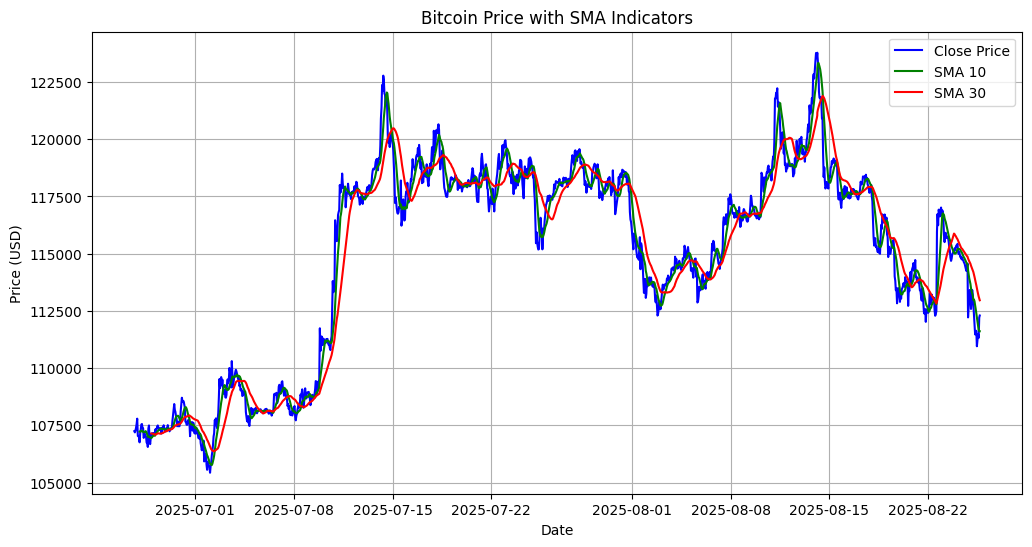

In [5]:
plt.figure(figsize=(12,6))
plt.plot(df["timestamp"], df["price"], label="Close Price", color="blue")
plt.plot(df["timestamp"], df["SMA_10"], label="SMA 10", color="green")
plt.plot(df["timestamp"], df["SMA_30"], label="SMA 30", color="red")
plt.title("Bitcoin Price with SMA Indicators")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

### 2. Volatility

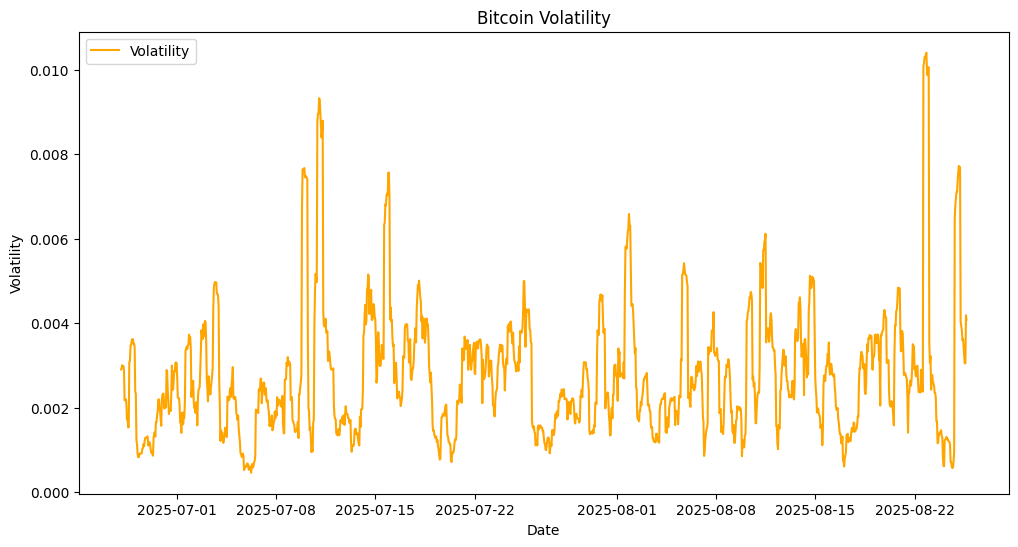

In [6]:
plt.figure(figsize=(12,6))
plt.plot(df["timestamp"], df["Volatility"], label="Volatility", color="orange")
plt.title("Bitcoin Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.show()

### 3. RSI

In [7]:
import numpy as np
import pandas as pd

def calculate_rsi(prices, period=14):
    delta = prices.diff()  # difference between consecutive prices
    
    # Separate gains and losses
    gain = np.where(delta > 0, delta, 0)
    loss = np.where(delta < 0, -delta, 0)

    # Convert to pandas series for rolling mean
    gain = pd.Series(gain, index=prices.index)
    loss = pd.Series(loss, index=prices.index)

    # Calculate rolling averages
    avg_gain = gain.rolling(window=period, min_periods=period).mean()
    avg_loss = loss.rolling(window=period, min_periods=period).mean()

    # Calculate RS (Relative Strength)
    rs = avg_gain / avg_loss

    # Calculate RSI
    rsi = 100 - (100 / (1 + rs))
    
    return rsi

# Apply RSI on your dataframe
df["RSI"] = calculate_rsi(df["price"], period=14)

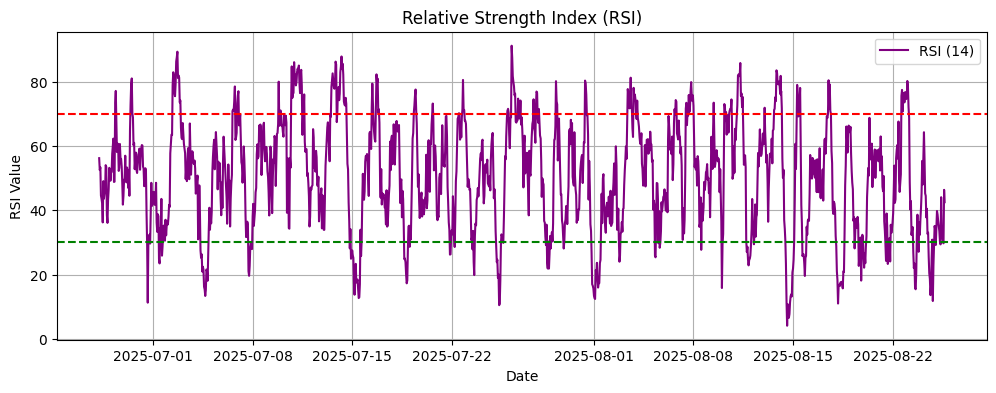

In [8]:
# Plot RSI
plt.figure(figsize=(12,4))
plt.plot(df["timestamp"], df["RSI"], label="RSI (14)", color="purple")
plt.axhline(70, linestyle="--", color="red")
plt.axhline(30, linestyle="--", color="green")
plt.title("Relative Strength Index (RSI)")
plt.xlabel("Date")
plt.ylabel("RSI Value")
plt.legend()
plt.grid(True)
plt.show()

# ✅ Conclusion

- We successfully fetched crypto data using the **CoinGecko API**  
- Applied **technical indicators** (SMA, Volatility, RSI)  
- Created **interactive financial charts**   

This notebook demonstrates **data analysis & visualization**, while the dashboard will shows **deployment & interactivity** which we will create now.
